In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

### Prepare a prediction model for predicting Price.

<ul>
<li>Do transformations for getting better predictions of price and make a table containing R^2 value for each prepared model.</li>
<ul>

Consider these columns for prediction.

"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight".

### Features

<ul>
    <li>Model -- model of the car</li>
    <li>Price -- Offer Price in EUROs</li>
    <li>Age_08_04 -- Age in months as in August 2004</li>
    <li>KM -- Accumulated Kilometers on odometer</li>
    <li>HP -- Horse Power</li>
    <li>cc -- Cylinder Volume in cubic centimeters</li>
    <li>Doors -- Number of doors</li>
    <li>Gears -- Number of gear positions</li>
    <li>Quarterly_Tax -- Quarterly road tax in EUROs</li>
    <li>Weight -- Weight in Kilograms</li>
</ul>

## Importing dataset

In [3]:
df = pd.read_csv("05_01_ToyotaCorolla.csv", encoding='latin1')
df.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [4]:
print('Number of Rows {} Columns {}'.format(df.shape[0], df.shape[1]))

Number of Rows 1436 Columns 38


In [5]:
consider_these_columns = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df = df[consider_these_columns]
df.head(3)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


## Descriptive Analysis

In [6]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Observation: There are no null Values in the dataset by reading counts from above.

## Checking for Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


#### Observation: all the data types are correct .

## Renaming the columns name to make it short

In [8]:
df1=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


## Checking for missing values

In [9]:
df1.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
df1[df1.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### Observation: Notice there are no '0' values in the dataset.

## Visualize Missing values

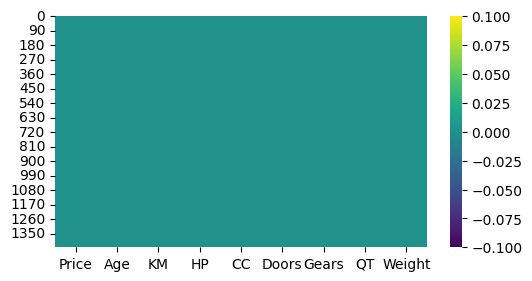

In [11]:
plt.figure(figsize=(6,3))
sns.heatmap(df1.isnull(),cmap='viridis')
plt.show()

#### Observation: No missing Values are present in the data set

## Checking for Duplicated Values

In [12]:
df1.duplicated().sum()

1

In [13]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
df1[df1.duplicated()].shape

(1, 9)

In [15]:
df1=df1.drop_duplicates().reset_index(drop=True)
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### Observation: Notice There are duplicated values in the dataset so we dropped them.

## Visualizing Continuous Datatype for Outlier Detection

In [16]:
discrete_feature=[feature for feature in df1.columns if len(df1[feature].unique())<20 and feature]
print('Discrete features are:', discrete_feature)

Discrete features are: ['HP', 'CC', 'Doors', 'Gears', 'QT']


In [17]:
continuous_feature=[feature for feature in df1.columns if df1[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Features are:', continuous_feature)

Continuous Features are: ['Price', 'Age', 'KM', 'Weight']


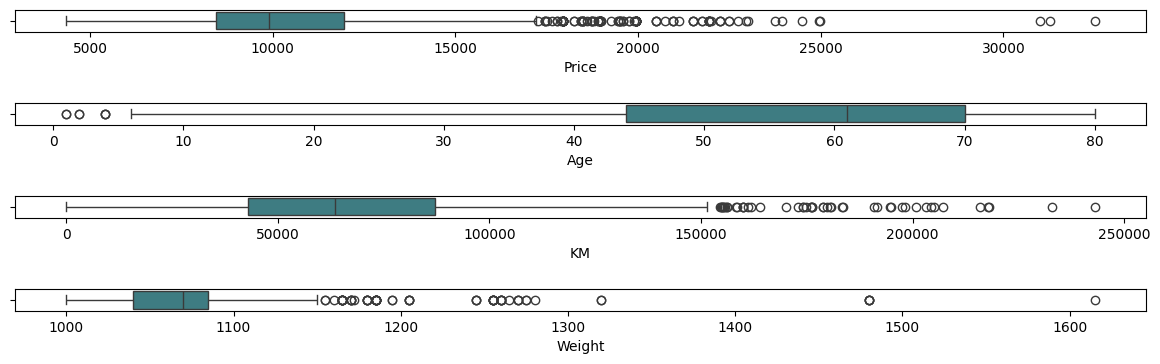

In [18]:
df1_1=df1.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,4),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df1_1,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df1_1,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df1_1,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df1_1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### Observation: A significant amount of outliers are present in each continuous feature

<ul>
<li>We can't simply remove the outliers that would mean loss of information</li>
<li>We need to try different types of transformation or imputation and select the one with the best results</li>
<li>Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values</li>
</ul>

In [19]:
stats = df1_1['Price'].describe()[["50%","25%","75%"]]
stats['IQR'] = stats["75%"] - stats["25%"]
stats['Upper_Bound'] = stats["75%"] + 1.5*stats['IQR']
stats['Lower_Bound'] = stats["25%"] - 1.5*stats['IQR']
stats

50%             9900.0
25%             8450.0
75%            11950.0
IQR             3500.0
Upper_Bound    17200.0
Lower_Bound     3200.0
Name: Price, dtype: float64

In [20]:
outlier_masks = []

outlier_mask = (df1_1['Price'] <= stats['Lower_Bound']) | (df1_1['Price'] >= stats['Upper_Bound'])
outlier_masks.append(outlier_mask)

outliers = df1_1.loc[outlier_masks[0], 'Price']
outliers.head()

7     18600
8     21500
10    20950
11    19950
12    19600
Name: Price, dtype: int64

In [21]:
df1_1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [22]:
cols = ['Price','Age', 'Weight', 'KM']
i = 0
for col in cols[1:]:
    i = i + 1
    stats = df1_1[col].describe()[["50%","25%","75%"]]
    stats['IQR'] = stats["75%"] - stats["25%"]
    stats['Upper_Bound'] = stats["75%"] + 1.5*stats['IQR']
    stats['Lower_Bound'] = stats["25%"] - 1.5*stats['IQR']

    outlier_mask = (df1_1[col] <= stats['Lower_Bound']) | (df1_1[col] >= stats['Upper_Bound'])
    outlier_masks.append(outlier_mask)

## Build Model without removing outliers

In [23]:
model = smf.ols("Price~Age+KM+Weight", data = df1_1)
raw_model = model.fit()
raw_model.rsquared, raw_model.rsquared_adj

(0.8467399730874641, 0.8464186732406873)

In [24]:
# raw_model.rsquared , raw_model.rsquared_adj 

## Let's try Median Imputation to handle Outlier in continuous features

In [25]:
df2 = df1.copy()
df2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

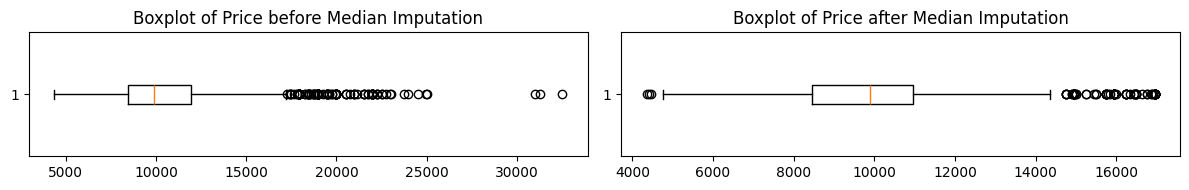

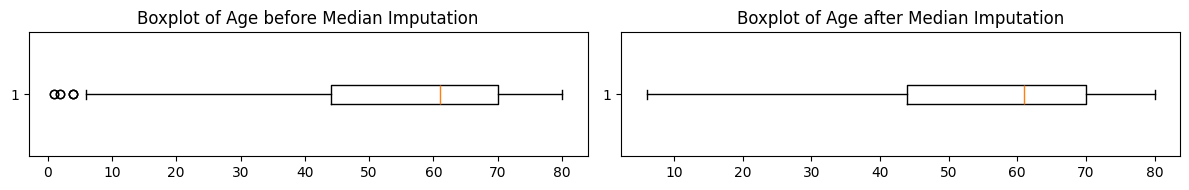

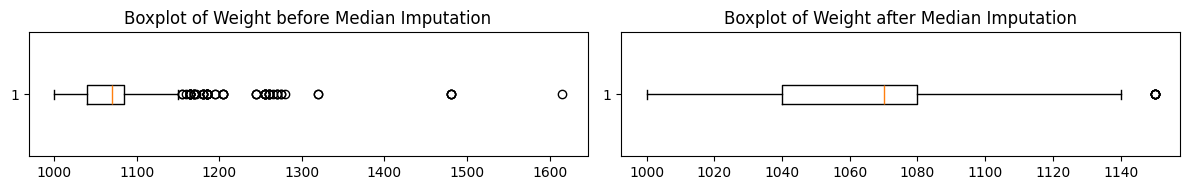

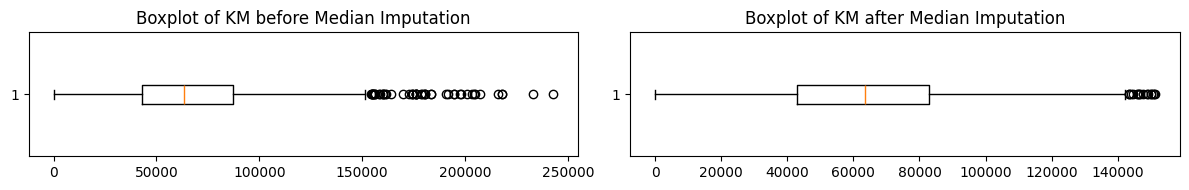

In [26]:
cols = ['Price','Age','Weight','KM']
i = 0
for col in cols:
    median = df2[col].median()

    plt.subplots(1,2,figsize = (12,2))
    
    outliers_before_imputation = df2.loc[outlier_masks[i], col]
    # outliers_before_imputation.shape = 110, 7, 65, 49.
    plt.subplot(1,2,1)
    plt.boxplot(df2[col], vert=False)
    plt.title("Boxplot of "+col+" before Median Imputation")
    
    # Impute outliers with median
    df2.loc[outlier_masks[i], col] = median
    
    outliers_after_imputation = df2.loc[outlier_masks[i], col]

    plt.subplot(1,2,2)
    plt.boxplot(df2[col],vert=False)
    plt.title("Boxplot of "+col+" after Median Imputation")
    plt.tight_layout()
    plt.show()

    i=i+1

## Let's test our data in model and compare the R-squared with Median imputation data model

In [27]:
model = smf.ols("Price~Age+KM+Weight", data = df2)
after_median_imputation_model = model.fit()
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.4647823098851873, 0.46366026022037643)

#### Observation: As you can see after median imputation the model is not performing well.

## Let's try Mean Imputation to handle Outlier in Profit

In [28]:
df3 = df1.copy()

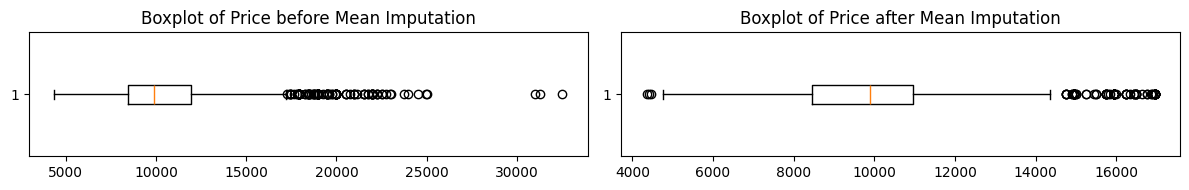

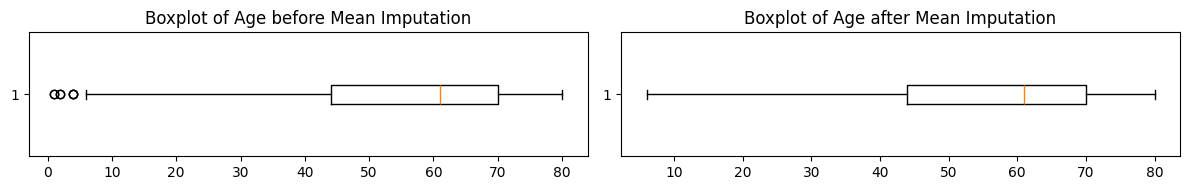

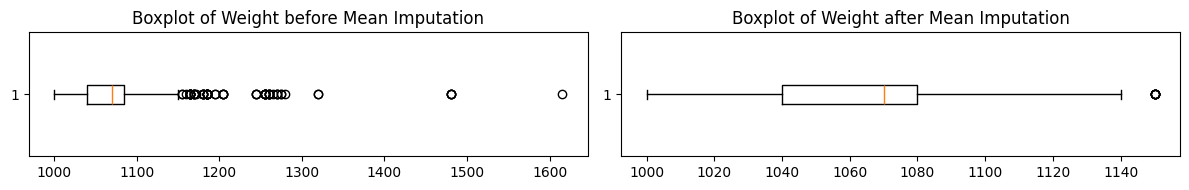

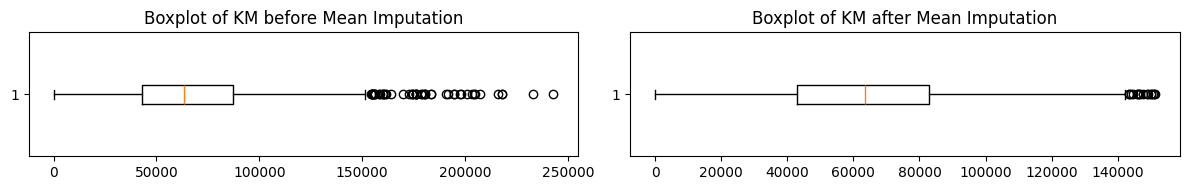

In [29]:
cols = ['Price','Age','Weight','KM']
i = 0
for col in cols:
    mean = df3[col].mean()

    plt.subplots(1,2,figsize = (12,2))
    
    outliers_before_imputation = df3.loc[outlier_masks[i], col]
    # outliers_before_imputation.shape = 110, 7, 65, 49.
    plt.subplot(1,2,1)
    plt.boxplot(df3[col], vert=False)
    plt.title("Boxplot of "+col+" before Mean Imputation")
    
    # Impute outliers with mean
    df3.loc[outlier_masks[i], col] = mean
    
    outliers_after_imputation = df3.loc[outlier_masks[i], col]

    plt.subplot(1,2,2)
    plt.boxplot(df3[col],vert=False)
    plt.title("Boxplot of "+col+" after Mean Imputation")
    plt.tight_layout()
    plt.show()

    i=i+1

In [30]:
model = smf.ols("Price~Age+KM+Weight", data = df3)
after_mean_imputation_model = model.fit()
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.5400001115456343, 0.5390357511924806)

#### Observation: As you can see after mean imputation the model is performing well as compared to median but let's consider next case.

## Now to remove the outlier and fit the model

In [31]:
df4 = df1.copy()
df4.shape

(1435, 9)

In [32]:
df4 = df4[~( (outlier_masks[0]) | (outlier_masks[1]) | (outlier_masks[2]) | (outlier_masks[3]) )] 
df4.shape

(1254, 9)

In [33]:
model = smf.ols("Price~Age+KM+Weight", data = df4)
# model = smf.ols("Profit~RDS+MKTS", data = df4) passed cook's distance.
removed_outlier_model = model.fit()
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.77962547509187, 0.7790965762320905)

In [34]:
np.sqrt(removed_outlier_model.mse_resid)

1066.2936465311118

#### Observation: A Slightly better score of 77.96%

## Detecting Influencers/Outliers in the raw data model

In [35]:
df1_1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [36]:
model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = df1_1)
raw_data_model = model.fit()
raw_data_model.rsquared, raw_data_model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [37]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

#### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [38]:
k=df1_1.shape[1]
n=df1_1.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2)) #0.37

Cut-off line at 0.02


#### Let's plot the influencers and also plot a cut off line using the stem plot

In [39]:
df1_1.shape

(1435, 9)

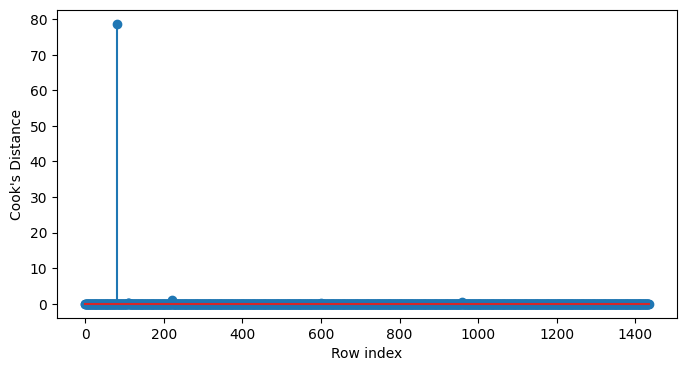

In [40]:
fig = plt.figure(figsize = (8,4))
x = [0,1434]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [np.round(leverage_cutoff,2), np.round(leverage_cutoff,2)]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df1_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [41]:
np.argmax(c) , np.max(c)

(80, 78.72950582252706)

In [42]:
df1_1[df1_1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


#### Let's improve the model by deleting the influence point and creating a new dataframe

In [43]:
df5 = df1_1

In [44]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df5).fit()
        c, _ =raw_data_model.get_influence().cooks_distance
        # print("np.argmax(c) , np.max(c):",np.argmax(c) , np.max(c))
        df5=df5.drop(df5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        # print("The model accuracy is improved to",raw_data_model.rsquared)

final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df5).fit()
final_model.rsquared , final_model.aic
print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9003762532318558


In [45]:
c, p_value = final_model.get_influence().cooks_distance

In [46]:
df5.shape

(1330, 9)

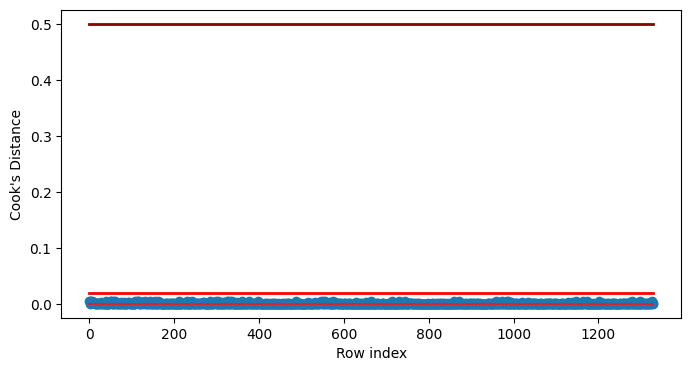

In [47]:
fig = plt.figure(figsize = (8,4))
x = [0, df5.shape[0] - 1]
y = [0.5, 0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [np.round(leverage_cutoff,2), np.round(leverage_cutoff,2)]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

#### Observation: All the points are below our cut-off line
Hence, we can say that there are no influncers present in our final model we can proceed with the predictions

## Model Predictions

In [48]:
final_model.rsquared, final_model.rsquared_adj, np.sqrt(final_model.mse_resid)

(0.9003762532318558, 0.8997729300114582, 975.92713992628)

In [49]:
df5.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [50]:
predicted = pd.DataFrame()
predicted['Age'] = df5.Age
predicted['KM'] = df5.KM
predicted['HP'] = df5.HP
predicted['CC'] = df5.CC
predicted['Doors'] = df5.Doors
predicted['Gears'] = df5.Gears
predicted['QT'] = df5.QT
predicted['Weight'] = df5.Weight

predicted['Price'] = df5.Price
predicted['Predicted_Price'] = pd.DataFrame(final_model.predict(predicted[['Age','KM','HP','CC','Doors','Gears','QT','Weight']]))
predicted.head()

,Age,KM,HP,CC,Doors,Gears,QT,Weight,Price,Predicted_Price
0,23,72937,90,2000,3,5,210,1165,13750,15354.362106
1,26,48000,90,2000,3,5,210,1165,14950,15415.237858
2,30,38500,90,2000,3,5,210,1170,13750,15314.008799
3,32,61000,90,2000,3,5,210,1170,12950,14749.534289
4,27,94612,90,2000,3,5,210,1245,16900,17544.273936


## Table containing metrics for each prepared model

In [51]:
vals = dict()

models = [raw_model, after_median_imputation_model, after_mean_imputation_model, removed_outlier_model, final_model]
rsquared_values, rsquared_adj_values, rmse_values = [], [], []

for x in models:
    rsquared_values.append(x.rsquared)
    rsquared_adj_values.append(x.rsquared_adj)
    rmse_values.append(np.sqrt(x.mse_resid))

vals['rsquared'] = rsquared_values
vals['rsquared_adj'] = rsquared_adj_values
vals['RMSE'] = rmse_values

indexes = ['raw_model', 'after_median_imputation_model', 'after_mean_imputation_model', 'removed_outlier_model', 'final_model']
model_metrics = pd.DataFrame(data = vals, index = indexes)
model_metrics

,rsquared,rsquared_adj,RMSE
raw_model,0.846740,0.846419,1414.242733
after_median_imputation_model,0.464782,0.463660,1659.128255
after_mean_imputation_model,0.540000,0.539036,1544.584149
removed_outlier_model,0.779625,0.779097,1066.293647
final_model,0.900376,0.899773,975.927140


## Visualize Model Performance

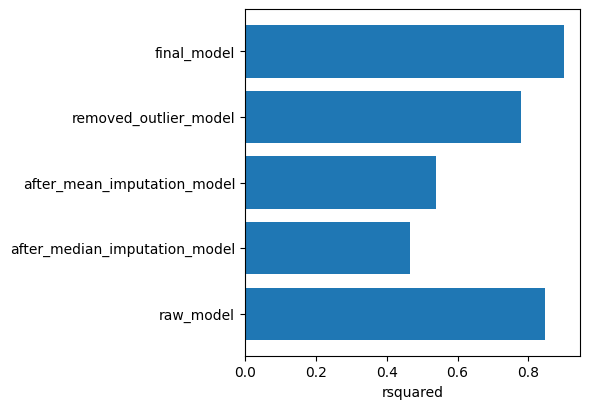

In [52]:
plt.figure(figsize=(6,4))
plt.barh(y=model_metrics.index, width = model_metrics.rsquared, height=0.8)
plt.tight_layout()
plt.xlabel(xlabel='rsquared')
plt.show()